In [92]:
!pip install qiskit

In [0]:
import math
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import execute, Aer, IBMQ
from qiskit.tools.visualization import matplotlib_circuit_drawer as drawer, qx_color_scheme,plot_histogram


def qft6(circ, q, n):
  for k in reversed(range(n)):
    circ.h(q[k]) 
    for j in reversed(range(k)):
      
      circ.cu1(math.pi/float(2**(k-j)), q[j], q[k])
     

In [0]:
q = QuantumRegister(6, "q")
c = ClassicalRegister(6, "c")

qftcirc = QuantumCircuit(q, c, name="qft6")

In [0]:

qft6(qftcirc, q, 6)
qftcirc.barrier()
for j in range(6):
  qftcirc.measure(q[j], c[j])

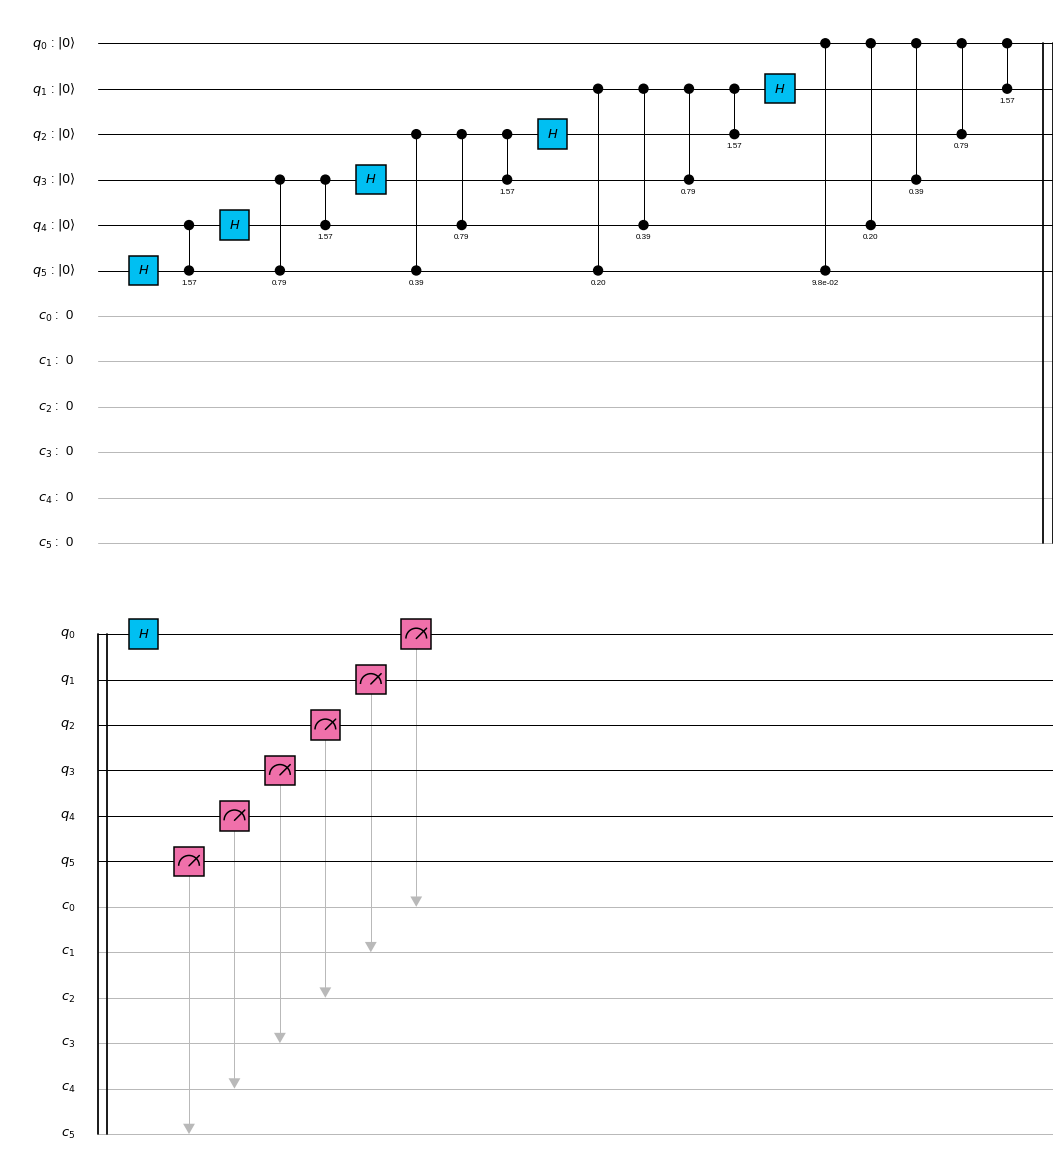

In [105]:
drawer(qftcirc,style=qx_color_scheme())

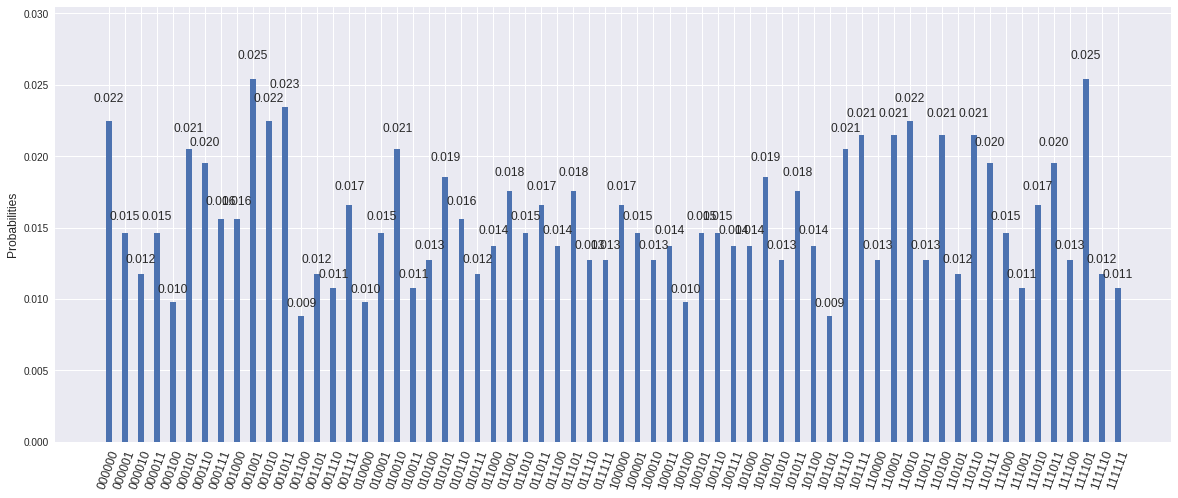

In [116]:
#print('Qasm simulator')
sim_backend = Aer.get_backend('qasm_simulator')
job = execute([qftcirc], sim_backend, shots=1024)
result = job.result()

plot_histogram(result.get_counts(qftcirc), options = {'width': 20, 'height': 8})

